In [1]:
import numpy as np
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.Util import param_util
from lenstronomy.Plots import lens_plot

# Define the lens model
lens_model_list = ['SIE']
lensModel = LensModel(lens_model_list=lens_model_list)

# Example SIE parameters
theta_E = 1.0  # Einstein radius
e1, e2 = param_util.phi_q2_ellipticity(phi=0.5, q=0.7)  # Ellipticity parameters
kwargs_sie = [{'theta_E': theta_E, 'e1': e1, 'e2': e2, 'center_x': 0, 'center_y': 0}]

In [2]:
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
ext = LensModelExtensions(lens_model)

NameError: name 'lens_model' is not defined

In [3]:
# Resolution of the grid to compute critical curves and caustics
numPix = 1000  # number of pixels per axis
deltaPix = 0.005  # pixel size in arcsec (same as grid scale)

# Get critical curves and caustics
x_crit, y_crit, x_caustic, y_caustic = ext.critical_curve_caustics(kwargs_lens=kwargs_sie, compute_window=numPix*deltaPix, grid_scale=deltaPix)




NameError: name 'ext' is not defined

In [4]:
def polygon_area(x, y):
    """ Calculate the area of a polygon using the Shoelace formula """
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Calculate the area enclosed by the critical curve
area_crit = polygon_area(x_crit, y_crit)
print("Area of the critical curve:", area_crit)


NameError: name 'x_crit' is not defined

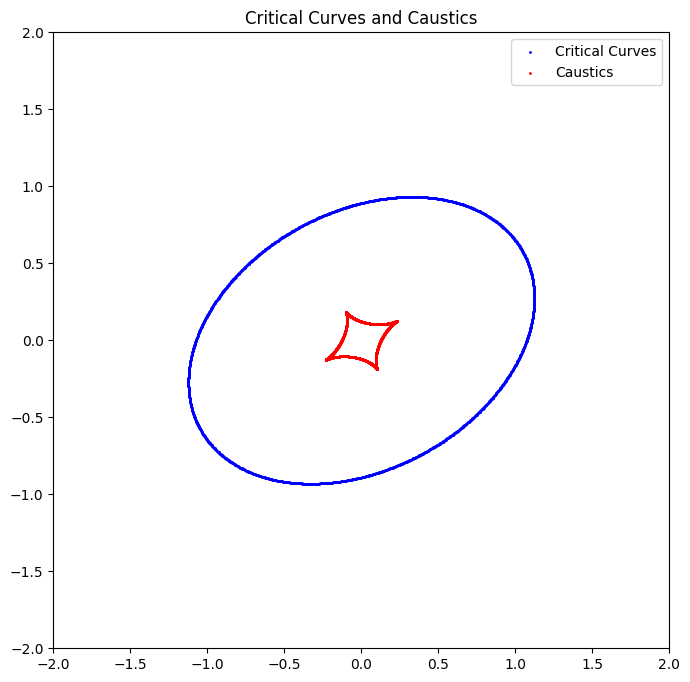

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(x_crit, y_crit, color='b', s=1, label='Critical Curves')
ax.scatter(x_caustic, y_caustic, color='r', s=1, label='Caustics')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.set_title('Critical Curves and Caustics')
ax.legend()
plt.show()


In [5]:
import numpy as np
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Util import param_util
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
import matplotlib.pyplot as plt

# Define the lens model
lens_model_list = ['SIE']
lens_model = LensModel(lens_model_list=lens_model_list)

# Example SIE parameters
theta_E = 1.0  # Einstein radius
e1, e2 = param_util.phi_q2_ellipticity(phi=0.5, q=0.7)  # Ellipticity parameters
kwargs_sie = [{'theta_E': theta_E, 'e1': e1, 'e2': e2, 'center_x': 0, 'center_y': 0}]

ext = LensModelExtensions(lens_model)

In [6]:
# Resolution of the grid to compute critical curves and caustics
numPix = 1000  # number of pixels per axis
deltaPix = 0.005  # pixel size in arcsec (same as grid scale)

# Get critical curves and caustics
x_crit, y_crit, x_caustic, y_caustic = ext.critical_curve_caustics(kwargs_lens=kwargs_sie, compute_window=numPix*deltaPix, grid_scale=deltaPix)

In [12]:
def polygon_area(x, y):
    """ Calculate the area of a polygon using the Shoelace formula """
    x = np.ravel(x)  # Flatten the array to ensure correct orientation
    y = np.ravel(y)  # Flatten the array to ensure correct orientation
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


# Calculate the area enclosed by the caustic curve
area_caustic = polygon_area(x_caustic, y_caustic)
print("Area of the caustic curve:", area_caustic)

# Calculate the area enclosed by the critical curve
area_crit = polygon_area(x_crit, y_crit)
print("Area of the critical curve:", area_crit)

# area of the einstein radius
area_einstein = np.pi * theta_E**2
print("Area of the Einstein radius:", area_einstein)

Area of the caustic curve: 0.06563587356108735
Area of the critical curve: 3.1415968853156357
Area of the Einstein radius: 3.141592653589793


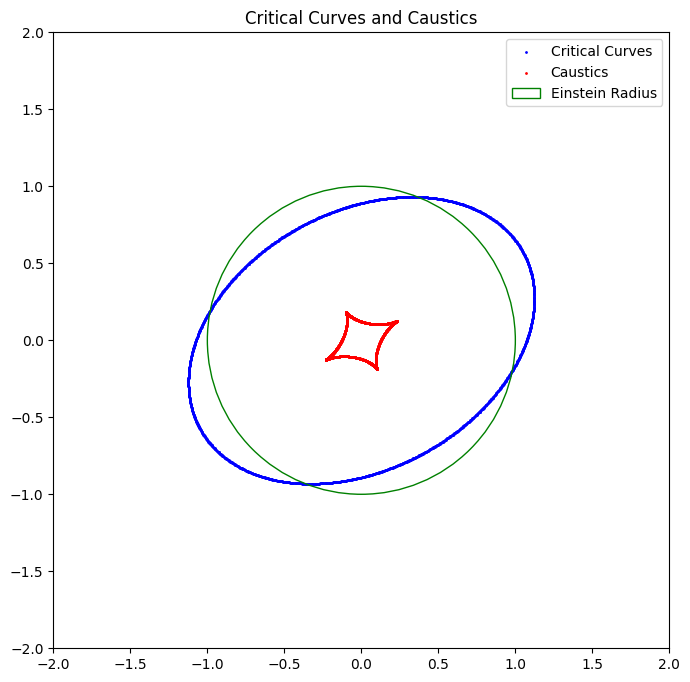

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(x_crit, y_crit, color='b', s=1, label='Critical Curves')
ax.scatter(x_caustic, y_caustic, color='r', s=1, label='Caustics')
# plot the Einstein radius
circle = plt.Circle((0, 0), theta_E, color='g', fill=False, label='Einstein Radius')
ax.add_artist(circle)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.set_title('Critical Curves and Caustics')
ax.legend()
plt.show()

In [25]:
import numpy as np
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.LensModel.Solver.epl_shear_solver import caustics_epl_shear
from shapely.geometry import Polygon
import pointpats
import matplotlib.pyplot as plt

In [20]:
lens_parameters = np.array([2, 0.024069457093642648, -0.016002190961948142, 1.8945414936459974, 0.10117465203892329, 0.09600089396968613, 0.2503743800068136, 0.9418211055453296, 2.5055790287104725e-06, 0, 'EPL_NUMBA', 'SHEAR'], dtype=object)
lens_parameters = np.array([2, -0.04030088581646998, -0.01419438113690042, 2.0068239327017, 0.08482718989370612, -0.015393332086560785, 1.0952303138971118, 2.5534097159384417, 1.0125570159563301e-06, 1, 'EPL_NUMBA', 'SHEAR'], dtype=object)

In [21]:
n_min_images = int(lens_parameters[0])
zl = lens_parameters[6]
zs = lens_parameters[7]
einstein_radius = lens_parameters[8]
iteration = lens_parameters[9]

# define return value if strong lensing condition not satisfied

# lensModel parameters are the same for the three functions used for image param calculation
# 1. x-y position of images in the source plane, 2. magnifications, 3. time-delays (relative)
lensModel = LensModel(
    lens_model_list=lens_parameters[10:].tolist(), z_lens=zl, z_source=zs
)

lens_eq_solver = LensEquationSolver(lensModel)

factor = 1.0
# ---------------------------------------------------#
#     x-y position of images in the source plane
# ---------------------------------------------------#
# Get the caustic curve cut by the lens
# First check if there is any nan in the caustic points
while True:
    kwargs_lens = [
        {
            "theta_E": factor,
            "e1": lens_parameters[1],
            "e2": lens_parameters[2],
            "gamma": lens_parameters[3],
            "center_x": 0.0,
            "center_y": 0.0,
        },
        {
            "gamma1": lens_parameters[4],
            "gamma2": lens_parameters[5],
            "ra_0": 0,
            "dec_0": 0,
        },
    ]
    caustic_double_points = caustics_epl_shear(
        kwargs_lens, return_which="double", maginf=-100
    )
    caustic = np.logical_not(np.isnan(caustic_double_points).any())

    # If there is a nan, caustic=False, draw a new gamma
    if caustic:
        break
    else:
        print("Found invalid caustic. Will resample parameters.")

caustic_double = Polygon(caustic_double_points.T)

In [26]:
x_source_array, y_source_array = [], []
for i in range(100):
    x_source, y_source = pointpats.random.poisson(caustic_double, size=1)
    x_source_array.append(x_source)
    y_source_array.append(y_source)

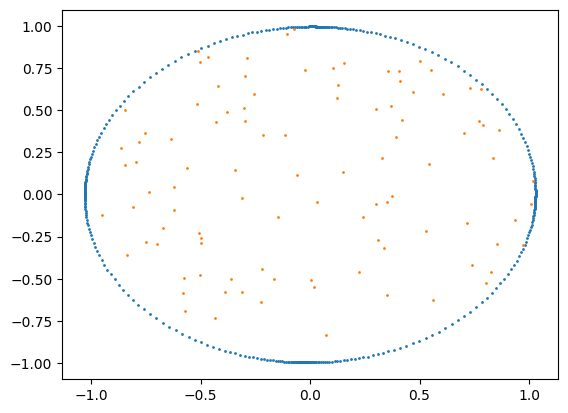

In [27]:
plt.scatter(*caustic_double.exterior.xy, s=1)
plt.scatter(x_source_array, y_source_array, s=1)
plt.show()